In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings

from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.api as sm

pd.options.display.float_format = '{:.3f}'.format

warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


### Run model #1

In [3]:
X = data[['TV', 'Radio', 'Newspaper']] 
y = data['Sales']

In [4]:
est = sm.OLS(y, X) 
estres = est.fit() 
print(estres.summary()) 
ypred = estres.predict(X) 
print(ypred)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3566.
Date:                Thu, 14 Mar 2019   Prob (F-statistic):          2.43e-171
Time:                        09:09:52   Log-Likelihood:                -423.54
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     197   BIC:                             863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.0

### P-value of Newspaper is > .05 therefore not statistically significant.  

### Look at residuals (errors)

In [61]:
actual = data['Sales']
residual = actual - ypred

In [62]:
print(residual)

0      0.159
1     -1.486
2     -2.991
3      0.189
4     -0.208
5     -5.396
6      1.023
7      2.183
8      3.854
9     -1.082
10     3.348
11     0.450
12    -0.989
13     2.645
14    -0.064
15     0.399
16    -1.198
17    -0.476
18     2.714
19     1.044
20    -0.802
21    -1.799
22     0.522
23    -0.977
24     3.241
25    -3.248
26     0.590
27    -1.112
28    -0.891
29     2.461
       ...  
170    2.823
171    0.210
172    1.793
173    0.848
174   -1.439
175    0.535
176   -0.215
177    0.219
178   -3.994
179    1.174
180    1.359
181   -1.214
182    3.911
183   -0.034
184   -1.290
185    1.221
186    1.882
187    0.336
188   -2.636
189    2.612
190   -0.556
191    3.338
192    3.532
193    1.233
194    1.235
195    4.491
196    3.408
197    1.104
198   -0.202
199   -1.143
Length: 200, dtype: float64


### Plot the residuals

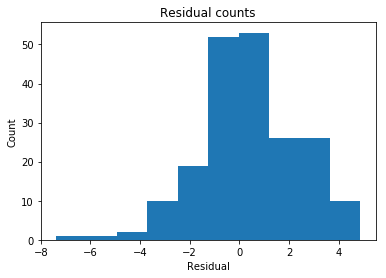

In [10]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

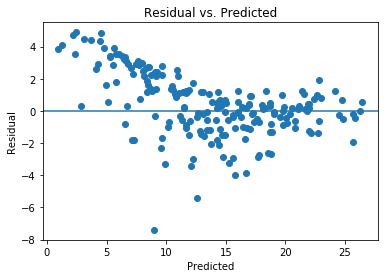

In [12]:
plt.scatter(ypred, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Model #2 Remove Newspaper from the model

In [13]:
X_1 = data[['TV', 'Radio']] 

est = sm.OLS(y, X_1) 
estres = est.fit() 
print(estres.summary()) 
ypred_1 = estres.predict(X_1) 
print(ypred_1)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5206.
Date:                Thu, 14 Mar 2019   Prob (F-statistic):          6.73e-172
Time:                        09:13:58   Log-Likelihood:                -426.71
No. Observations:                 200   AIC:                             857.4
Df Residuals:                     198   BIC:                             864.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0548      0.001     42.962      0.0

### Look at residuals (errors)

In [15]:
residual_1 = actual - ypred_1

In [16]:
print(residual_1)

0      0.573
1     -1.300
2     -2.458
3      0.460
4      0.439
5     -4.799
6      0.918
7      1.989
8      3.834
9     -0.971
10     3.608
11    -0.031
12    -0.375
13     2.562
14     0.054
15     0.444
16     0.158
17    -0.365
18     2.674
19     0.890
20    -0.505
21    -1.723
22     1.130
23    -1.004
24     3.314
25    -3.244
26     0.259
27    -1.204
28    -1.131
29     2.858
       ...  
170    2.924
171    0.553
172    1.789
173    0.791
174   -1.499
175    0.291
176   -0.540
177    0.527
178   -3.919
179    1.161
180    1.298
181   -1.057
182    4.275
183    0.294
184   -1.339
185    0.730
186    2.154
187    0.056
188   -3.062
189    2.823
190   -1.050
191    3.214
192    3.991
193    0.555
194    0.701
195    4.633
196    3.379
197    0.901
198    0.049
199   -1.357
Length: 200, dtype: float64


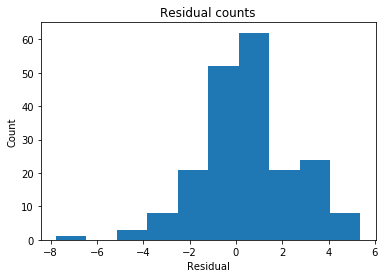

In [17]:
plt.hist(residual_1)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

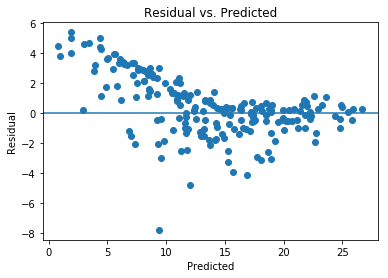

In [19]:
plt.scatter(ypred_1, residual_1)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Finding outliers

In [20]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000,200.000
mean,100.500,147.042,23.264,30.554,14.023
std,57.879,85.854,14.847,21.779,5.217
min,1.000,0.700,0.000,0.300,1.600
25%,50.750,74.375,9.975,12.750,10.375
50%,100.500,149.750,22.900,25.750,12.900
75%,150.250,218.825,36.525,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


In [21]:
np.percentile(data.TV, 90)

261.44

In [22]:
data['TV_outlier'] = np.where(data.TV >= 261.44, 1,0)

In [23]:
data[['TV', 'TV_outlier']].head()

,TV,TV_outlier
0,230.100,0
1,44.500,0
2,17.200,0
3,151.500,0
4,180.800,0


In [24]:
np.percentile(data.Radio, 90)

43.519999999999996

In [25]:
data['Radio_outlier'] = np.where(data.Radio >= 43.51, 1,0)

In [26]:
data[['Radio', 'Radio_outlier']].head()

,Radio,Radio_outlier
0,37.800,0
1,39.300,0
2,45.900,1
3,41.300,0
4,10.800,0


In [29]:
data['Radio_outlier'].value_counts()

0    180
1     20
Name: Radio_outlier, dtype: int64

In [30]:
data['TV_outlier'].value_counts()

0    180
1     20
Name: TV_outlier, dtype: int64

In [31]:
X_2 = data[['TV_outlier', 'Radio_outlier']] 

est = sm.OLS(y, X_2) 
estres = est.fit() 
print(estres.summary()) 
ypred_2 = estres.predict(X_2) 
print(ypred_2)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     41.76
Date:                Thu, 14 Mar 2019   Prob (F-statistic):           7.37e-16
Time:                        09:18:53   Log-Likelihood:                -789.63
No. Observations:                 200   AIC:                             1583.
Df Residuals:                     198   BIC:                             1590.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
TV_outlier       17.7687      2.833      6.272

### The R2 is not strong

### Look at residuals

In [33]:
residual_2 = actual - ypred_2
print(residual_2)

0     22.100
1     10.400
2     -7.663
3     18.500
4     12.900
5     -9.763
6     11.800
7     13.200
8      4.800
9     10.600
10     8.600
11    17.400
12     9.200
13     9.700
14    19.000
15     5.437
16    12.500
17     6.631
18    11.300
19    14.600
20    18.000
21    12.500
22     5.600
23    15.500
24     9.700
25    -5.769
26    15.000
27    15.900
28    18.900
29    10.500
       ...  
170    8.400
171   14.500
172    7.600
173   11.700
174   11.500
175   -7.732
176   20.200
177   11.700
178   -5.969
179   12.600
180   10.500
181   12.200
182    8.700
183    8.431
184   17.600
185    5.637
186   10.300
187   17.300
188   -1.869
189    6.700
190   10.800
191    9.900
192    5.900
193   19.600
194   17.300
195    7.600
196    9.700
197   12.800
198    7.731
199   13.400
Length: 200, dtype: float64


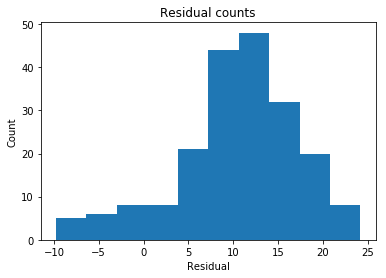

In [34]:
plt.hist(residual_2)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

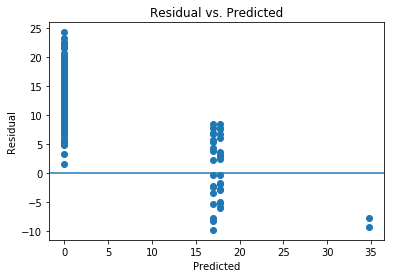

In [35]:
plt.scatter(ypred_2, residual_2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Removing the outlier does not help the model

### Transformations

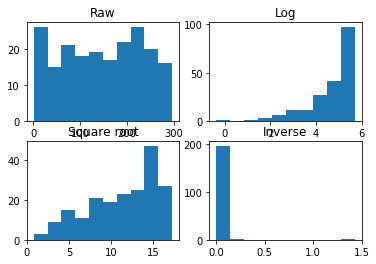

In [36]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(data['TV'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(data['TV']))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(data['TV']))
plt.title('Square root')
         
fig.add_subplot(224)
plt.hist(1/data['TV'])
plt.title('Inverse')
         
plt.show()


In [42]:
data['TV'] = data['TV'].replace(0, .0001)
data['Radio'] = data['Radio'].replace(0, .0001)
data['Log_TV'] = (np.log(data['TV']))
data['Sqrt_TV'] = (np.sqrt(data['TV']))
data['Inverse_TV'] = (1/data['TV'])

Text(0.5,1,'Inverse')

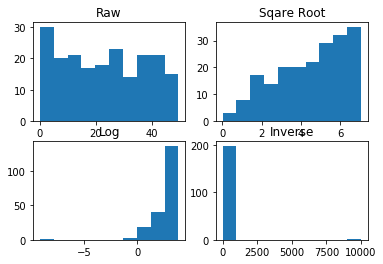

In [43]:
fig = plt.figure()

fig.add_subplot(221)
plt.hist(data['Radio'])
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.sqrt(data['Radio']))
plt.title('Sqare Root')

fig.add_subplot(223)
plt.hist(np.log(data['Radio']))
plt.title('Log')


fig.add_subplot(224)
plt.hist(1/data['Radio'])
plt.title('Inverse')

In [54]:
print(scipy.stats.shapiro(data['Radio']))
print(scipy.stats.shapiro(np.sqrt(data['Radio'])))
print(scipy.stats.shapiro(np.log(data['Radio'])))
print(scipy.stats.shapiro(1/data['Radio']))

(0.9440049529075623, 5.197267682888196e-07)
(0.9463818073272705, 8.582681516600132e-07)
(0.6875836849212646, 4.81378222764329e-19)
(0.04414701461791992, 1.8146095008897884e-30)


In [55]:
print(scipy.stats.shapiro(data['TV']))
print(scipy.stats.shapiro(np.sqrt(data['TV'])))
print(scipy.stats.shapiro(np.log(data['TV'])))
print(scipy.stats.shapiro(1/data['TV']))

(0.9495093822479248, 1.6926975376918563e-06)
(0.9346348643302917, 8.027988940284558e-08)
(0.8279647827148438, 4.1153742875521884e-14)
(0.15050655603408813, 3.965617649278688e-29)


In [44]:
data['Sqrt_Radio'] = (np.sqrt(data['Radio']))

In [56]:
X_3 = data[['TV', 'Sqrt_Radio']] 

est = sm.OLS(y, X_3) 
estres = est.fit() 
print(estres.summary()) 
ypred_3 = estres.predict(X_3) 
print(ypred_3)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6562.
Date:                Thu, 14 Mar 2019   Prob (F-statistic):          1.08e-181
Time:                        09:43:01   Log-Likelihood:                -403.93
No. Observations:                 200   AIC:                             811.9
Df Residuals:                     198   BIC:                             818.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0465      0.001     35.289      0.0

In [59]:
residual_3 = actual - ypred_3

In [60]:
print(residual_3)

0      1.627
1     -1.643
2     -2.280
3      1.235
4     -0.729
5     -4.332
6      0.015
7      0.571
8      2.094
9     -1.248
10     1.697
11    -0.370
12    -1.334
13     0.783
14     0.391
15     2.332
16    -0.277
17     1.313
18     0.880
19    -0.023
20    -0.521
21    -2.122
22    -1.359
23    -1.648
24     1.157
25    -3.190
26    -0.252
27    -1.757
28    -0.942
29     0.855
       ...  
170    0.657
171   -0.417
172   -0.445
173   -0.363
174   -1.766
175    3.008
176   -0.085
177   -0.651
178   -3.468
179   -0.125
180    0.659
181   -1.649
182    2.290
183    2.404
184   -1.535
185    2.390
186    1.513
187   -0.103
188   -3.319
189    0.296
190   -1.237
191    1.163
192    1.879
193    1.538
194    0.851
195    2.764
196    1.801
197   -0.276
198    2.012
199   -2.049
Length: 200, dtype: float64


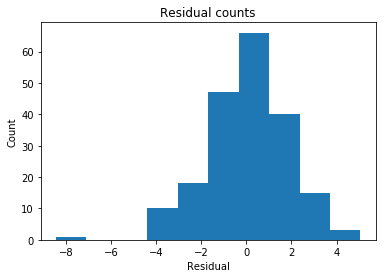

In [63]:
plt.hist(residual_3)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

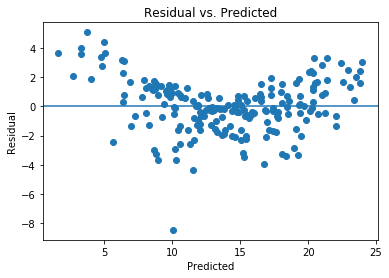

In [64]:
plt.scatter(ypred_3, residual_3)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [67]:
print(scipy.stats.shapiro(residual))
print(scipy.stats.shapiro(residual_1))
print(scipy.stats.shapiro(residual_2))
print(scipy.stats.shapiro(residual_3))

(0.9837928414344788, 0.02110707387328148)
(0.9770374894142151, 0.002305384259670973)
(0.9529919624328613, 3.706066991071566e-06)
(0.9787420630455017, 0.003958761226385832)


### Ulitmately the best model is 'residual_3'  It has the best R2 and t-value